<a href="https://colab.research.google.com/github/napsternxg/TRAC2020/blob/master/TRAC_English.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
pip install torch transformers tensorboardX

  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=5a4283a6e8b4e0560b679561d0e1e83420e868ab274ac7d887eef0860fe55986
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%env TRAC_PATH /content/gdrive/My Drive/TRAC2020/

env: TRAC_PATH=/content/gdrive/My Drive/TRAC2020/


In [4]:
%%bash 
echo "${TRAC_PATH}"
ls -ltrh "${TRAC_PATH}/data"
realpath "${TRAC_PATH}"
ls -ltrh "${TRAC_PATH}"/data/**/*

/content/gdrive/My Drive/TRAC2020/
total 4.0K
drwx------ 2 root root 4.0K Mar  5 10:20 raw
/content/gdrive/My Drive/TRAC2020
/content/gdrive/My Drive/TRAC2020//data/raw/iben:
total 479K
-rw------- 1 root root 385K Mar  5 10:20 trac2_iben_train.csv
-rw------- 1 root root  92K Mar  5 10:20 trac2_iben_dev.csv
-rw------- 1 root root 1.3K Mar  5 10:20 README.txt

/content/gdrive/My Drive/TRAC2020//data/raw/hin:
total 633K
-rw------- 1 root root 1.3K Mar  5 10:20 README.txt
-rw------- 1 root root 507K Mar  5 10:20 trac2_hin_train.csv
-rw------- 1 root root 125K Mar  5 10:20 trac2_hin_dev.csv

/content/gdrive/My Drive/TRAC2020//data/raw/eng:
total 622K
-rw------- 1 root root 495K Mar  5 10:20 trac2_eng_train.csv
-rw------- 1 root root 126K Mar  5 10:20 trac2_eng_dev.csv
-rw------- 1 root root 1.3K Mar  5 10:20 README.txt


In [0]:
%load_ext tensorboard
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
BASE_PATH = os.environ.get("TRAC_PATH")
DATA_PATHS_TRAIN = {
    "ENG": f"{BASE_PATH}/data/raw/eng/trac2_eng_train.csv",
    "IBEN": f"{BASE_PATH}/data/raw/iben/trac2_iben_train.csv",
    "HIN": f"{BASE_PATH}/data/raw/hin/trac2_hin_train.csv"
}
DATA_PATHS_DEV = {
    "ENG": f"{BASE_PATH}/data/raw/eng/trac2_eng_dev.csv",
    "IBEN": f"{BASE_PATH}/data/raw/iben/trac2_iben_dev.csv",
    "HIN": f"{BASE_PATH}/data/raw/hin/trac2_hin_dev.csv"
}
print(DATA_PATHS_TRAIN)
DATA_COLUMNS = ["row_id", "text", "task_1", "task_2",]
NUM_LANGUAGES = len(DATA_PATHS_TRAIN)

{'ENG': '/content/gdrive/My Drive/TRAC2020//data/raw/eng/trac2_eng_train.csv', 'IBEN': '/content/gdrive/My Drive/TRAC2020//data/raw/iben/trac2_iben_train.csv', 'HIN': '/content/gdrive/My Drive/TRAC2020//data/raw/hin/trac2_hin_train.csv'}


train
ENG /content/gdrive/My Drive/TRAC2020//data/raw/eng/trac2_eng_train.csv
IBEN /content/gdrive/My Drive/TRAC2020//data/raw/iben/trac2_iben_train.csv
HIN /content/gdrive/My Drive/TRAC2020//data/raw/hin/trac2_hin_train.csv
dev
ENG /content/gdrive/My Drive/TRAC2020//data/raw/eng/trac2_eng_dev.csv
IBEN /content/gdrive/My Drive/TRAC2020//data/raw/iben/trac2_iben_dev.csv
HIN /content/gdrive/My Drive/TRAC2020//data/raw/hin/trac2_hin_dev.csv


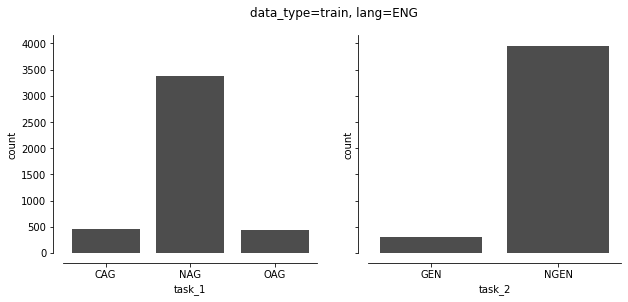

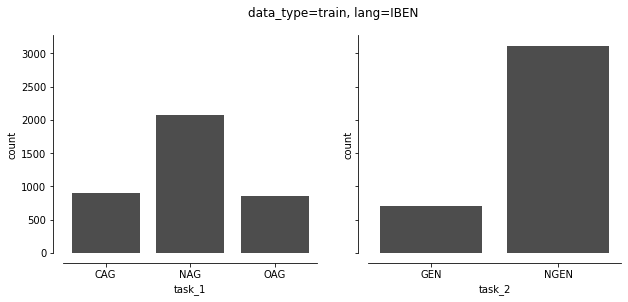

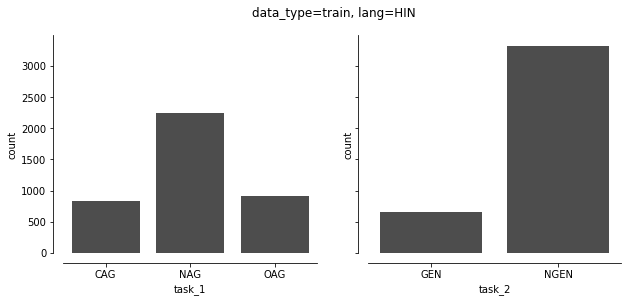

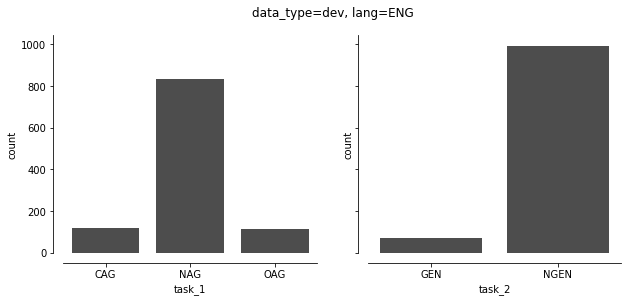

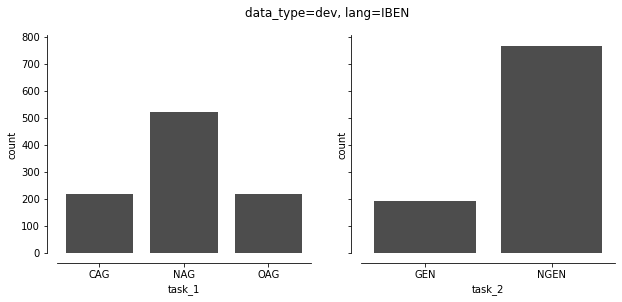

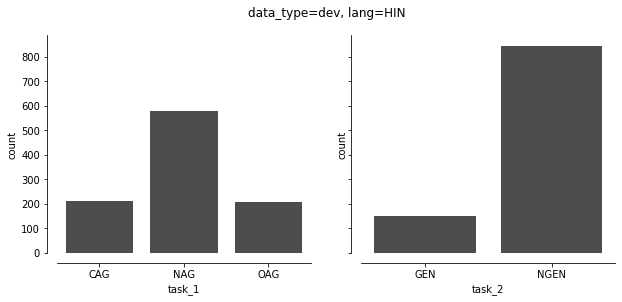

In [9]:
for data_type, DATA_PATHS in [("train", DATA_PATHS_TRAIN), ("dev", DATA_PATHS_DEV)]:
    print(data_type)
    for lang, path in DATA_PATHS.items():
        print(lang, path)
        df = pd.read_csv(path, sep=",").fillna("NULL")
        df.columns = DATA_COLUMNS
        task_cols = df.filter(regex=r'task_*', axis=1).columns
        n_cols = len(task_cols)
        fig, ax = plt.subplots(1, n_cols, sharey=True, figsize=(5*n_cols, 4))
        for axi, task in zip(ax.flatten(), task_cols):
            y = df[task].str.upper().replace("NULL", "NONE")
            sns.countplot(y, order=sorted(y.unique()), ax=axi, color="0.3")
        fig.suptitle(f"data_type={data_type}, lang={lang}")
        sns.despine(offset=10)